# Session 2 Exercises
These are sample answers for the in-class exercises in Session 2 of PHAS0030.  You should make sure that you can do these yourself ! The further work exercises will be in a separate notebook.

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Accuracy & Precision

### Question 1

In [2]:
print(0.3-0.2)
print(0.4-0.2)
print(0.3-(0.1+0.1+0.1))

0.09999999999999998
0.2
-5.551115123125783e-17


We see the effect of finite precision in the first and the third. For the second case, as the two numbers are a factor of two apart, the precision error will cancel, giving the exact result.

### Question 2

In [3]:
i=0
epsilon = 1.0
while 1.0+epsilon>1.0:
    i += 1
    print(i,epsilon)
    epsilon /= 2

1 1.0
2 0.5
3 0.25
4 0.125
5 0.0625
6 0.03125
7 0.015625
8 0.0078125
9 0.00390625
10 0.001953125
11 0.0009765625
12 0.00048828125
13 0.000244140625
14 0.0001220703125
15 6.103515625e-05
16 3.0517578125e-05
17 1.52587890625e-05
18 7.62939453125e-06
19 3.814697265625e-06
20 1.9073486328125e-06
21 9.5367431640625e-07
22 4.76837158203125e-07
23 2.384185791015625e-07
24 1.1920928955078125e-07
25 5.960464477539063e-08
26 2.9802322387695312e-08
27 1.4901161193847656e-08
28 7.450580596923828e-09
29 3.725290298461914e-09
30 1.862645149230957e-09
31 9.313225746154785e-10
32 4.656612873077393e-10
33 2.3283064365386963e-10
34 1.1641532182693481e-10
35 5.820766091346741e-11
36 2.9103830456733704e-11
37 1.4551915228366852e-11
38 7.275957614183426e-12
39 3.637978807091713e-12
40 1.8189894035458565e-12
41 9.094947017729282e-13
42 4.547473508864641e-13
43 2.2737367544323206e-13
44 1.1368683772161603e-13
45 5.684341886080802e-14
46 2.842170943040401e-14
47 1.4210854715202004e-14
48 7.105427357601002e-15

We get to a stage where epsilon is smaller than the precision with which floats are stored, and so the loop terminates.  For *exact* numerical operations, this should never end.

### Question 3

In [4]:
def series_approx_cos(x,n):
    """Approximate cosine(x) using Taylor series with n terms"""
    approx_cos = 0.0
    sign = 1.0 # We will multiply this by -1 for each step to find (-1)^i
    factorial = 1.0 # We will multiply by (i+1)*(i+2) to find (2i)!
    for i in range(n+1):
        approx_cos += sign * x**(2*i) / factorial
        sign *= -1
        factorial *= (2*i+1)*(2*i+2)
    return approx_cos

#### Question 4

In [5]:
true_answer = np.cos(1.0)
print("For x=1.0, np.cos gives ",true_answer)
for i in range(1,11):
    approx_answer = series_approx_cos(1.0,i)
    print("With ",i," terms, the error is ",true_answer - approx_answer)

For x=1.0, np.cos gives  0.5403023058681398
With  1  terms, the error is  0.040302305868139765
With  2  terms, the error is  -0.0013643607985268646
With  3  terms, the error is  2.4528090362019306e-05
With  4  terms, the error is  -2.734969395401521e-07
With  5  terms, the error is  2.076252725302652e-09
With  6  terms, the error is  -1.1422973678065773e-11
With  7  terms, the error is  4.773959005888173e-14
With  8  terms, the error is  0.0
With  9  terms, the error is  1.1102230246251565e-16
With  10  terms, the error is  1.1102230246251565e-16


## Approximating reality

### Question 1

In [6]:
# Set up time 
total_time = 2*365*24*60*60 # s
steps = 1001 # Subdivision
time = np.linspace(0,total_time,steps)
# Orbits
period_ES = 365*24*60*60 # s
period_ME = 28*24*60*60  # s

# Physical constants, approximated
radius_ES = 1.5e11 # m
radius_ME = 3.8e8  # m
mass_S = 2e30      # kg
mass_E = 6e24      # kg
mass_M = 7e22      # kg
G = 6.7e-11        # m^3 /kg s^2

In [7]:
# Position of Earth as a 2D array, starting on the x-axis
pos_ES = radius_ES * np.array([np.cos(2 * np.pi * time / period_ES), 
                               np.sin(2 * np.pi * time / period_ES)])

Text(0.5, 1.0, 'Acceleration of Earth considering Sun')

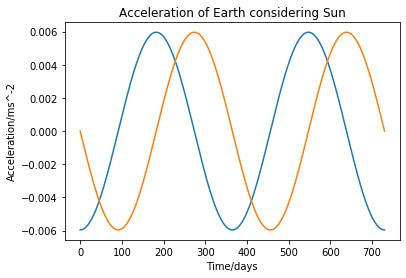

In [8]:
a_ES = -G*mass_S*pos_ES/(radius_ES**3)
plt.plot(time/(24*60*60),a_ES[0])
plt.plot(time/(24*60*60),a_ES[1])
plt.xlabel("Time/days")
plt.ylabel("Acceleration/ms^-2")
plt.title("Acceleration of Earth considering Sun")

Text(0.5, 1.0, 'Acceleration of Earth considering Sun & Moon')

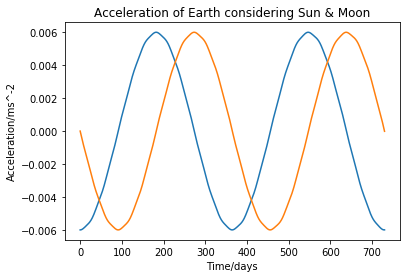

In [9]:
# Position of Moon relative to the Earth
pos_ME = radius_ME*np.array([np.cos(2*np.pi*time/period_ME),
                             np.sin(2*np.pi*time/period_ME)])
# Acceleration due to Moon's gravitational field
a_ME = -G*mass_M*pos_ME/(radius_ME**3)
a_E = a_ES + a_ME
plt.plot(time/(24*60*60),a_E[0])
plt.plot(time/(24*60*60),a_E[1])
plt.xlabel("Time/days")
plt.ylabel("Acceleration/ms^-2")
plt.title("Acceleration of Earth considering Sun & Moon")

Text(0.5, 1.0, 'Acceleration of Earth considering Moon only')

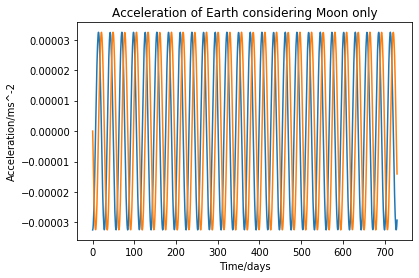

In [10]:
plt.plot(time/(24*60*60),a_ME[0])
plt.plot(time/(24*60*60),a_ME[1])
plt.xlabel("Time/days")
plt.ylabel("Acceleration/ms^-2")
plt.title("Acceleration of Earth considering Moon only")

The main thing to note here is the very different scales on the two graphs: the Moon makes very little difference to the Earth.  (Note, however, that in reality the Moon's gravity has an effect on the oceans - though the change in height of sea level of 3-5m is almost zero compared to the radius of the Earth.)

## Finding roots of functions

### Question 1

In [11]:
def cubic_to_solve(x):
    """Calculate f(x) = x^3 - 2x^2 - x + 2"""
    return x * x * x - 2 * x * x - x + 2

#### Question 2

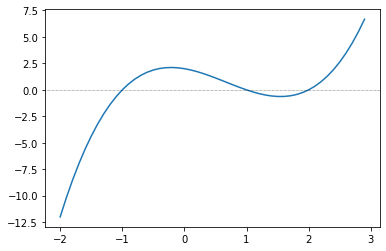

In [12]:
x = np.arange(-2,3,0.1)
plt.plot(x,cubic_to_solve(x))
plt.axhline(color='k',ls=':',lw='0.5')

#### Question 3

In [13]:
# Simple implementation of bisection method
a = -1.5
b = -0.5
fa = cubic_to_solve(a)
fb = cubic_to_solve(b)
tol = 1e-6
n = 0
while abs(b-a)>tol:
    n += 1
    c = (a+b)/2
    fc = cubic_to_solve(c)
    if fc*fa>0: # a and c are same sign
        a = c
        fa = fc
    else:
        b = c
        fb = fc
print("Finished after ",n," iterations with root at ",c)

Finished after  20  iterations with root at  -1.0000009536743164


Question 4 (the implementation of the bisection function) is part of the assignment.

## Optimising functions

#### Question 1

In [14]:
def function_2D(x,y):
    """Specified 2D function"""
    return 1.5*x*x + 2*x*y + 3*y*y - x + 4*y

#### Question 2

In [15]:
xarr = np.linspace(-5,5)
yarr = np.linspace(-5,5)
x2D, y2D = np.meshgrid(xarr,yarr)
store_array = function_2D(x2D, y2D)

#### Question 3

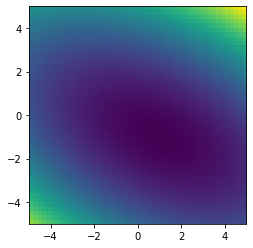

In [16]:
plt.imshow(store_array,extent=(-5,5,-5,5),origin='lower')

An alternative plotting function that avoids some of the confusion with origins that we have with `plt.imshow` is `plt.contourf`, which plots filled contours (`plt.contour` doesn't fill).

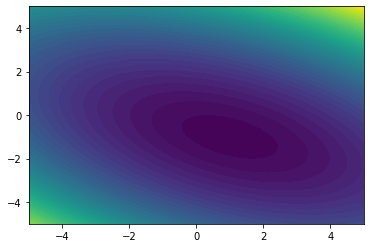

In [19]:
plt.contourf(x2D,y2D,store_array,50)

#### Question 4

In [25]:
def vector_dfunction_2D(xin):
    """Vector differential of specified 2D function"""
    x = xin[0]
    y = xin[1]
    df_dx = 3*x + 2*y - 1
    df_dy = 2*x + 6*y + 4
    return np.array([df_dx,df_dy])
def function(xin):
    """Specified 2D function"""
    x = xin[0]
    y = xin[1]
    return 1.5*x*x + 2*x*y + 3*y*y - x + 4*y

## SciPy routines

#### Question 1

In [26]:
from scipy import optimize
x0 = np.array([2.0, 2.0])
opt_result = optimize.minimize(function , x0, method='CG', jac= vector_dfunction_2D)

In [27]:
print(opt_result.success)
print("Minimum is at: ",opt_result.x)
print("Iters: ",opt_result.nit)

True
Minimum is at:  [ 1. -1.]
Iters:  2
